In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.express as px

In [70]:
df=pd.read_csv('train(in).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
df.drop(['PassengerId','Name',"Ticket"],axis=1,inplace=True)

In [72]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [73]:
def chk_types(df):
    dtypes =df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({"Dtypes":dtypes,"Num_uniques":n_unique}).T
 

# number of unique values in each file


In [74]:
def chk_types(df):
    """
    """
    dtypes = df.dtypes
    n_unique = df.nunique()
    result= pd.DataFrame({'dtypes': dtypes, 'n_unique': n_unique})
    return result
chk_types(df)

,dtypes,n_unique
Survived,int64,2
Pclass,int64,3
Sex,object,2
Age,float64,88
SibSp,int64,7
Parch,int64,7
Fare,float64,248
Cabin,object,147
Embarked,object,3


In [75]:
from process import chk_types
chk_types(df)

,dtypes,n_unique
Survived,int64,2
Pclass,int64,3
Sex,object,2
Age,float64,88
SibSp,int64,7
Parch,int64,7
Fare,float64,248
Cabin,object,147
Embarked,object,3


In [76]:
cols=["Survived","Pclass","Parch","Sex","Embarked","SibSp"]
df[cols]=df[cols].astype('category')
chk_types(df)


,dtypes,n_unique
Survived,category,2
Pclass,category,3
Sex,category,2
Age,float64,88
SibSp,category,7
Parch,category,7
Fare,float64,248
Cabin,object,147
Embarked,category,3


In [77]:
null=df.isnull().sum()
ratio=round((null/df.shape[0])*100,2).astype(str)+'%'
pd.DataFrame({"Null_sum":null,"Ratio%":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null_sum,0,0,0,177,0,0,0,687,2
Ratio%,0.0%,0.0%,0.0%,19.87%,0.0%,0.0%,0.0%,77.1%,0.22%


In [78]:
df1=df.dropna(subset=["Embarked"],inplace=True)
df2=df.drop("Cabin",axis=1,inplace=True)

In [79]:
median=df["Age"].median
median

<bound method Series.median of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64>

In [80]:
num_cols=df.select_dtypes("number").columns
num_cols

Index(['Age', 'Fare'], dtype='object')

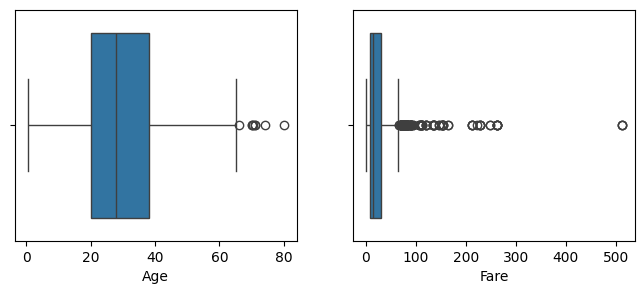

In [81]:
plt.figure(figsize=(8,3))
for i,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col],orient="h")


In [82]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    lower_outlier=df[df[col]<lower_bound][col].values
    upper_outlier=df[df[col]>upper_bound][col].values
    
    df[col].replace(lower_outlier,lower_bound,inplace=True)
    df[col].replace(upper_outlier,upper_bound,inplace=True)

C:\Users\Zyad Diab\AppData\Local\Temp\ipykernel_20844\3148355684.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Zyad Diab\AppData\Local\Temp\ipykernel_20844\3148355684.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

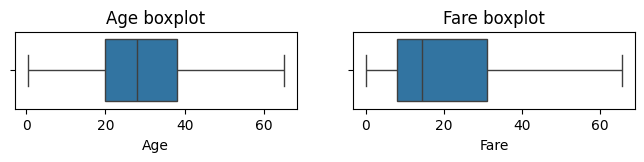

In [83]:
plt.figure(figsize=(8,1))
for i,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col],orient="h")
    plt.title(f"{col} boxplot")


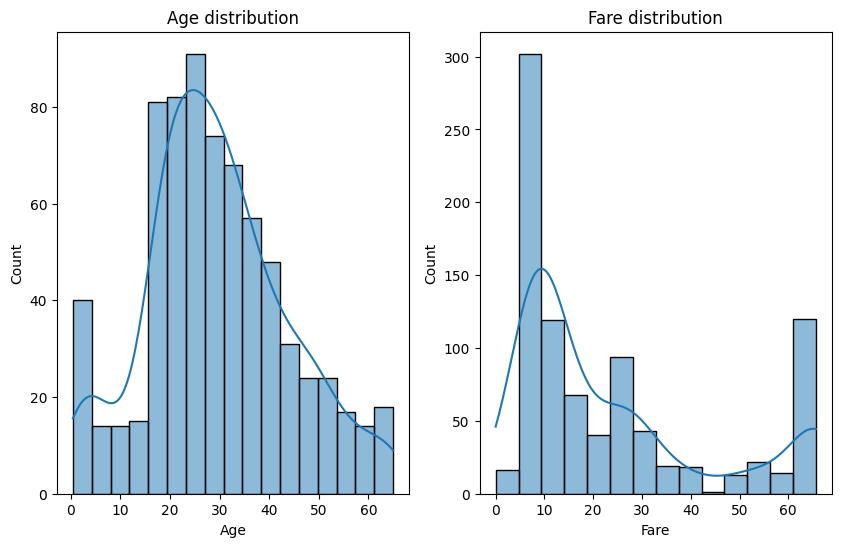

In [84]:
plt.figure(figsize=(10,6))
for i,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.histplot(df[col],kde=True)
    plt.title(f"{col} distribution")

In [85]:
plt.figure(figsize=(14,4))
for i,col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col,data=df)
    plt.title(f"{col} distribution")
plt.subplots_adjust(hspace=8,wspace=3)
plt.show()

NameError: name 'cat_cols' is not defined

<Figure size 1400x400 with 0 Axes>

In [ ]:
unique=df["Survived"].value_counts()
count=unique.values
cat=unique.index
cat

CategoricalIndex([0, 1], categories=[0, 1], ordered=False, dtype='category', name='Survived')

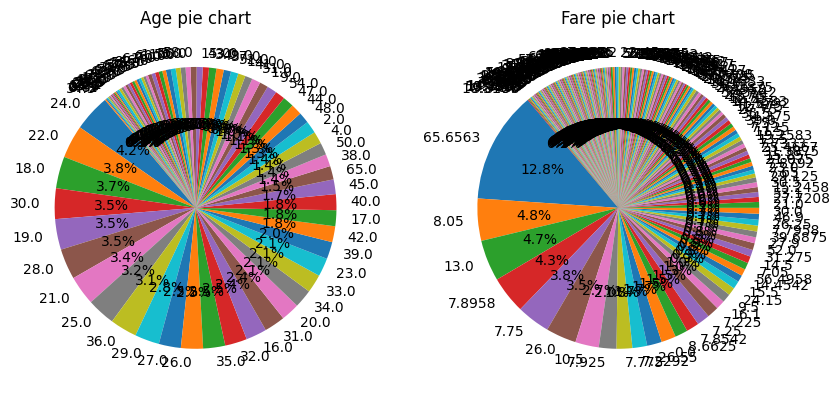

In [ ]:
plt.figure(figsize=(10,6))
for i,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    unique=df[col].value_counts()
    count=unique.values
    categories=unique.index
    plt.pie(count,labels=categories,startangle=130,autopct="%1.1f%%")
    plt.title(f"{col} pie chart")


In [ ]:
corr=df[["Age","Fare"]].corr()
corr

,Age,Fare
Age,1.000000,0.147042
Fare,0.147042,1.000000


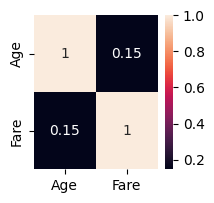

In [ ]:
corr=df[["Age","Fare"]].corr()
plt.figure(figsize=(2,2))
sns.heatmap(corr,annot=True)
plt.show()

C:\Users\Zyad Diab\AppData\Local\Temp\ipykernel_20844\1374541291.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  agg=df.pivot_table(index="Survived",columns="Sex",values="Age",aggfunc=len)


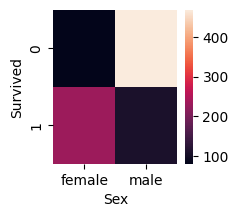

Sex,female,male
Survived,,
0,81,468
1,231,109


In [ ]:
plt.figure(figsize=(2,2))
agg=df.pivot_table(index="Survived",columns="Sex",values="Age",aggfunc=len)
sns.heatmap(agg)
plt.show()
agg

In [ ]:
df.duplicated().sum()

np.int64(120)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [ ]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,65.6563,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [ ]:
x=df.iloc[:,:]

In [ ]:
if we normalize, which is the advantage or disadvantage if we do it before splitting or after splitting 
# if we normalize before splitting, the model might learn patterns from the entire dataset, leading to data leakage and overfitting.
# Normalizing after splitting ensures that the model only learns from the training data, providing a more realistic evaluation on the test set. 


SyntaxError: invalid syntax (2996012052.py, line 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_cols=x.select_dtypes("number").columns
scaler.fit(x[num_cols])
x[num_cols]=scaler.transform(x[num_cols])

In [ ]:
x.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,0.334159,1,0,0.110424,S
1,1,1,female,0.581914,1,0,1.000000,C
2,1,3,female,0.396098,0,0,0.120704,S
3,1,1,female,0.535460,1,0,0.808757,S
4,0,3,male,0.535460,0,0,0.122608,S


In [ ]:
y.head

<bound method NDFrame.head of 0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 769, dtype: category
Categories (2, int64): [0, 1]>

In [ ]:
from category_encoders import OneHotEncoder
str_c=["Sex","Embarked"]
encoder=OneHotEncoder(cols=str_c,drop_invariant=True)
x=encoder.fit_transform(x)
x.head()

,Survived,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,0,3,1,0,0.334159,1,0,0.110424,1,0,0
1,1,1,0,1,0.581914,1,0,1.000000,0,1,0
2,1,3,0,1,0.396098,0,0,0.120704,1,0,0
3,1,1,0,1,0.535460,1,0,0.808757,1,0,0
4,0,3,1,0,0.535460,0,0,0.122608,1,0,0


In [ ]:
px.pie(df,names='Survived',title="<b> Survived Distribution</b>",color_discrete_sequence=px.colors.qualitative.Pastel)

In [ ]:
fig=px.pie(
    df,names="Survived",
    title="<b> Survived Distribution</b>",
    #color_discrete_sequence=px.colors.qualitative.Pastel,
    color_discrete_map={"0":"blue",
                        "1":"red"},
    category_orders={"Survived":["0","1"]},
    hole=0.4,
    )
fig.update_layout(annotations=[dict(text='Survived', x=0.5, y=0.5, font_size=18, showarrow=False)])

In [ ]:
px.scatter(df,x="Age",
           y="Fare",
           title="<b> Age vs Fare Scatter Plot</b>",
           labels={"Age":"Age","Fare":"Fare"},
           opacity=0.7)

In [ ]:
fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    title="Correlation Heatmap"
)

fig.update_layout(
    width=400,
    height=400,
    xaxis_title="Features",
    yaxis_title="Features"
)

fig.show()


In [ ]:
fig=px.imshow(agg,
              text_auto=True,
              color_continuous_scale="Blues",
              title="count of age by survived and sex"
)
fig.show()

In [ ]:
fig=px.histogram(df,x="Survived",
             color="Sex",
             title="<b> Survived based on gender",
             barmode="group")

fig.update_layout(width=600,
                  height=300,
                  bargap=0.2)
fig.show()

In [ ]:
from dash import Dash, html, dcc, Input, Output,State


In [ ]:
app=Dash()

In [ ]:
app.layout=html.Div([
    html.Button("Submit",id="Numbers"),
    dcc.Input(placeholder="Enter a valid number",id="Data"),
    html.H1(id="Output")
])

@app.callback(Output('Output','children'),
              Input('Numbers','n'),
              #State('Data','value')
              )
def play_data(n,Data):
    if int(Data)%2==0:
        return f"{Data} is even"    
app.run()

In [87]:
df=pd.read_csv(r'C:\Users\Zyad Diab\OneDrive\Desktop\projects\Dash.csv')
df.head()

,Month,Area,Sales,Unit,Profit
0,January,Cairo,15000,200,3250
1,January,Giza,8000,210,4000
2,January,Bani_Seif,16000,450,2000
3,January,Alex,12000,320,1000
4,January,Aswan,11500,150,900


In [89]:
app=Dash()
app.title="Interactive Dashboard"
num_cols=df.select_dtypes(include="number").columns
app.layout=html.Div([
    html.H1("Interactive Dashboard with Pie Chart"),
    html.Label("Select a value to show in pie plot:")
])

if __name__ == '__main__':
    app.run(debug=True)
